In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

from luwiji.logistic_regression import illustration

# Import Data

In [3]:
df = pd.read_csv("data/mushrooms.csv")
df.head()

,edible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,False,convex,smooth,brown,True,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
1,True,convex,smooth,yellow,True,almond,free,close,broad,black,...,smooth,white,white,partial,white,1,pendant,brown,numerous,grasses
2,True,bell,smooth,white,True,anise,free,close,broad,brown,...,smooth,white,white,partial,white,1,pendant,brown,numerous,meadows
3,False,convex,scaly,white,True,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
4,True,convex,smooth,gray,False,none,free,crowded,broad,black,...,smooth,white,white,partial,white,1,evanescent,brown,abundant,grasses


In [31]:
df.ring_number.value_counts()

ring_number
1    7488
2     600
0      36
Name: count, dtype: int64

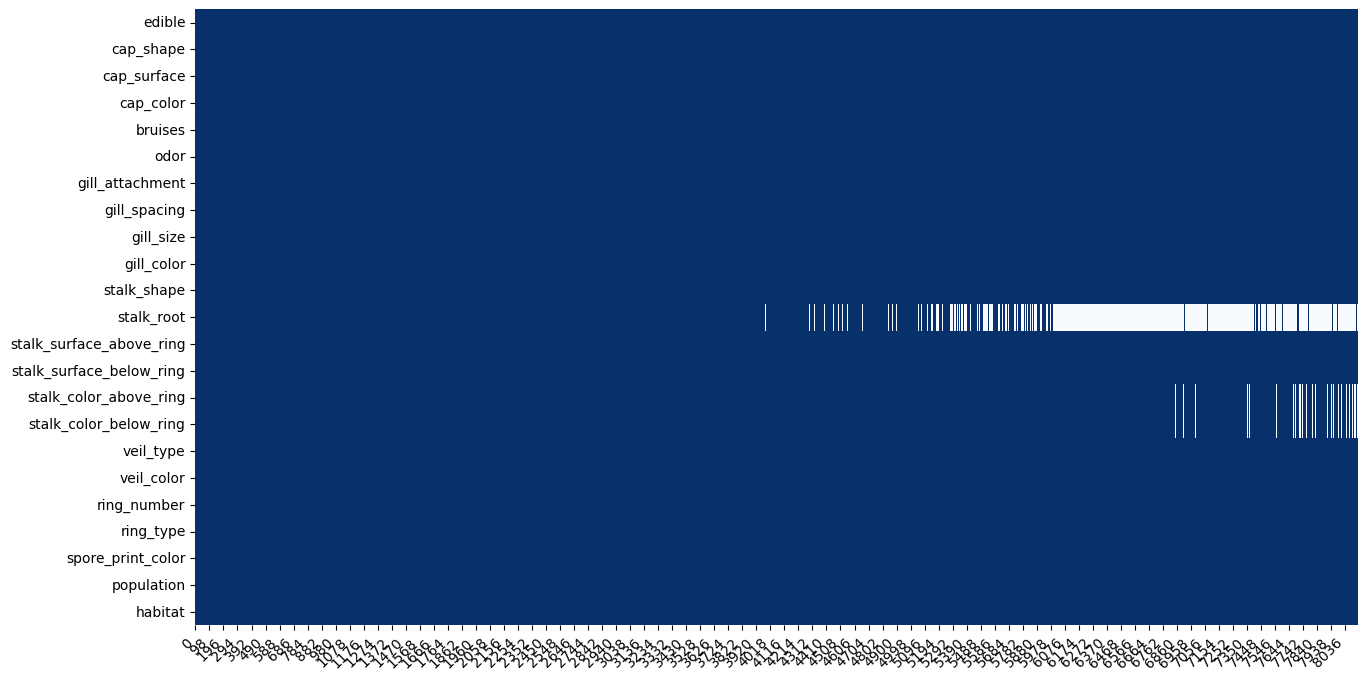

In [4]:
plot_missing_value(df)

# Assosiation Matrix

In [5]:
from jcopml.plot import plot_association_matrix

In [8]:
plot_association_matrix(df, "edible", categoric_col='auto')

interactive(children=(ToggleButtons(description='method', options=("Cramer's V", 'Proficiency U(X|Y)', 'Profic…

In [7]:
df.drop(columns="veil_type", inplace=True)

# Dataset Splitting

In [10]:
X = df[["odor", "gill_color", "ring_type", "spore_print_color"]]
y = df.edible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6499, 4), (1625, 4), (6499,), (1625,))

# Training

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [13]:
preprocessor = ColumnTransformer([
    ("categoric", cat_pipe(encoder="onehot"), X_train.columns)
])
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", LogisticRegression(solver="lbfgs", n_jobs=-1, random_state=42))
])

model = GridSearchCV(pipeline, gsp.logreg_params, cv=3,n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 14 candidates, totalling 42 fits
{'algo__C': 10.0, 'algo__fit_intercept': False}
0.9938452069549162 0.9938453960417766 0.9975384615384615


# Evaluation

In [14]:
from jcopml.plot import plot_confusion_matrix, plot_classification_report, plot_roc_curve, plot_pr_curve

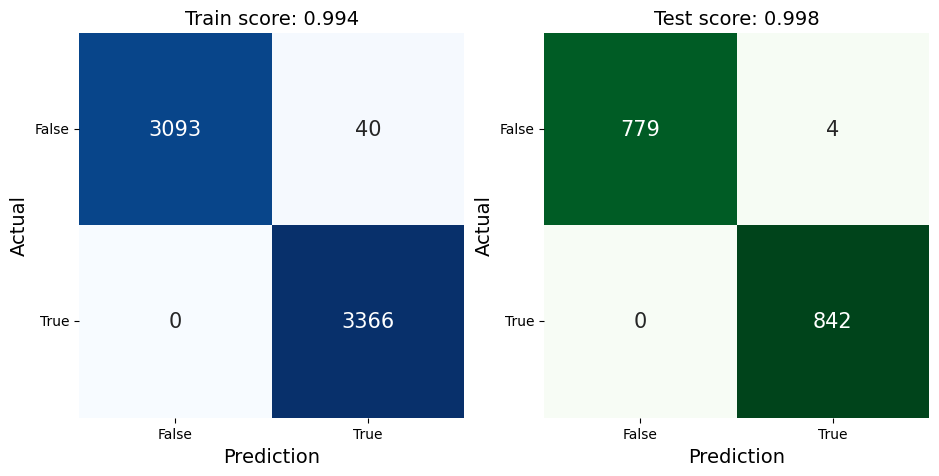

In [15]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

In [17]:
plot_classification_report(X_train, y_train, X_test, y_test, model, report=True)

Train report
              precision    recall  f1-score   support

       False       1.00      0.99      0.99      3133
        True       0.99      1.00      0.99      3366

    accuracy                           0.99      6499
   macro avg       0.99      0.99      0.99      6499
weighted avg       0.99      0.99      0.99      6499


Test report
              precision    recall  f1-score   support

       False       1.00      0.99      1.00       783
        True       1.00      1.00      1.00       842

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



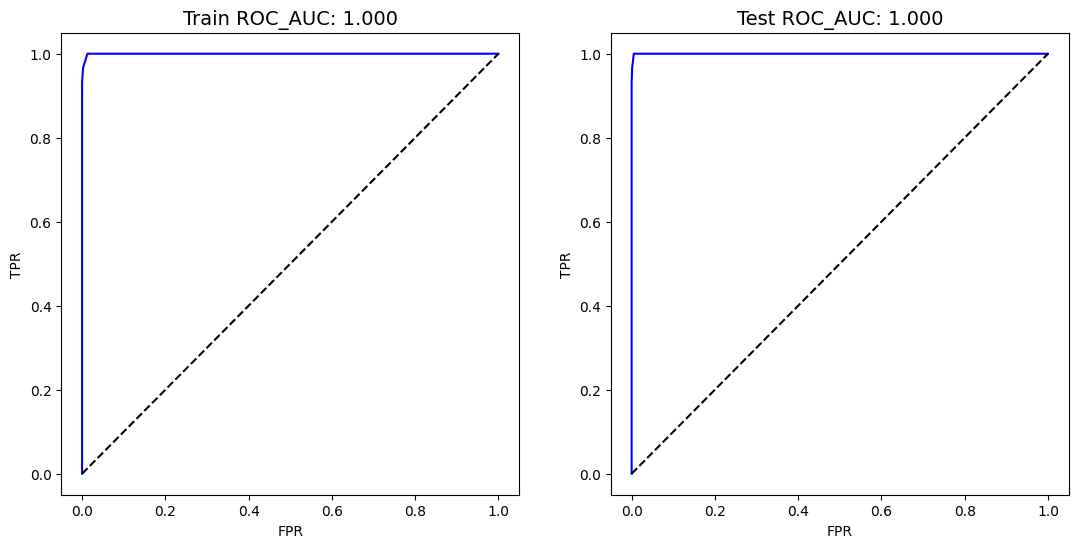

In [18]:
plot_roc_curve(X_train, y_train, X_test, y_test, model)

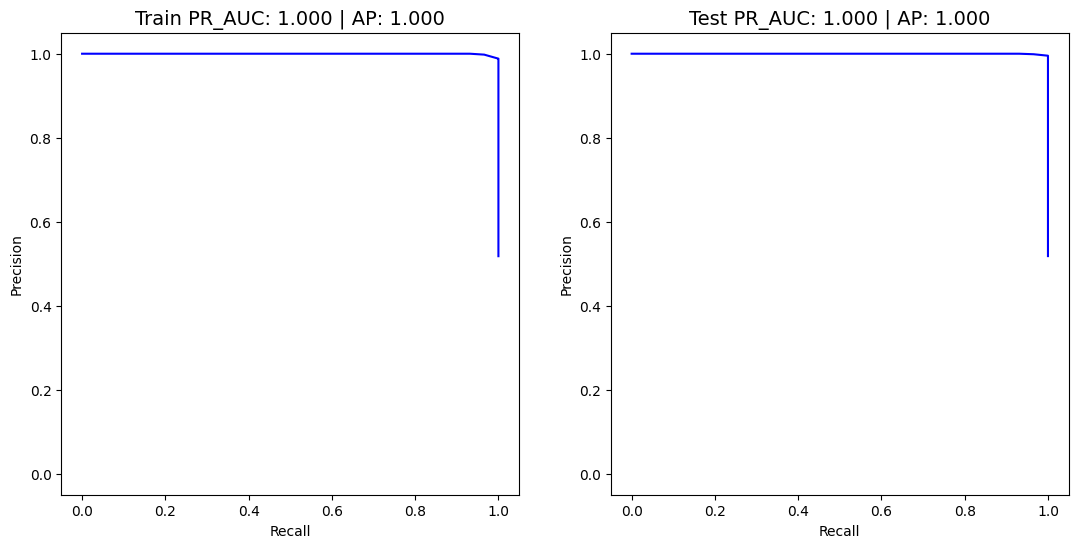

In [19]:
plot_pr_curve(X_train, y_train, X_test, y_test, model)

# Feature Important

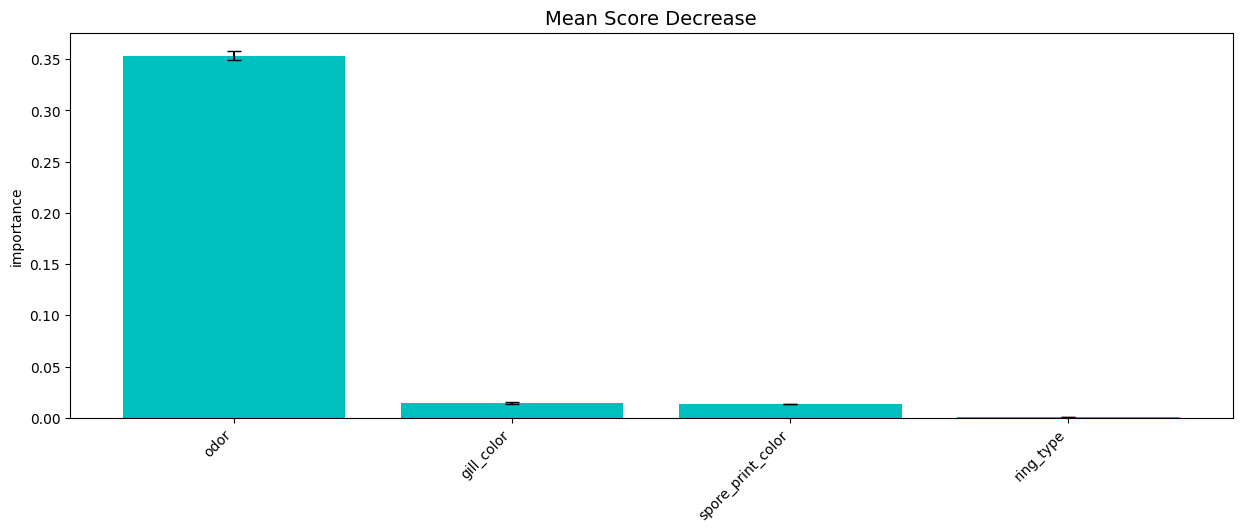

In [20]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=10)

# Insight from data

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='ring_type', ylabel='count'>

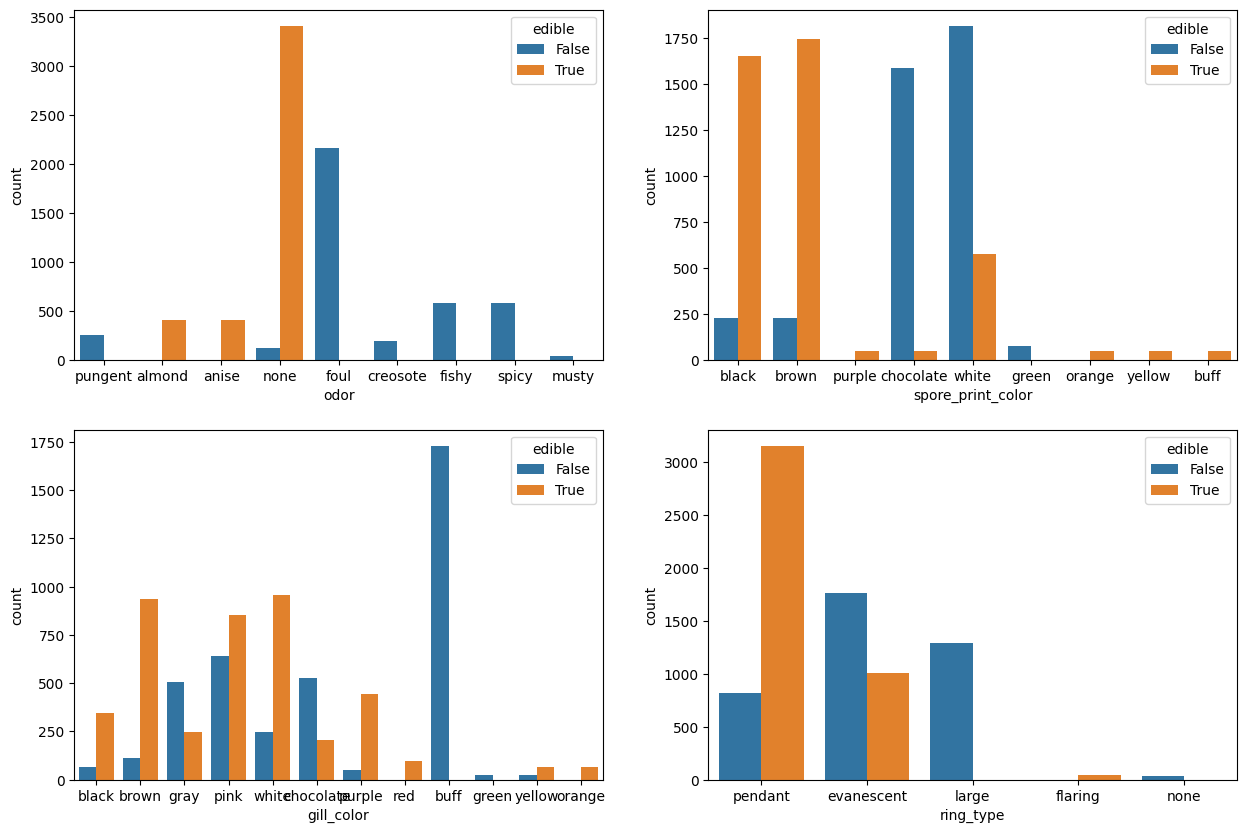

In [23]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.countplot(x="odor", data=df, hue="edible")
plt.subplot(222)
sns.countplot(x="spore_print_color", data=df, hue="edible")
plt.subplot(223)
sns.countplot(x="gill_color", data=df, hue="edible")
plt.subplot(224)
sns.countplot(x="ring_type", data=df, hue="edible")

# Correlation Ratio (Opsional)

In [28]:
from jcopml.plot import plot_correlation_ratio

In [32]:
plot_correlation_ratio(df, ['edible', 'cap_shape', 'odor'], ['ring_number'])

TypeError: agg function failed [how->mean,dtype->object]